In [2]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# K Nearest Neighbors

가장 중요한 hyperparameter인 K값은 근처에 참고할 이웃의 숫자이다.

![knn](https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

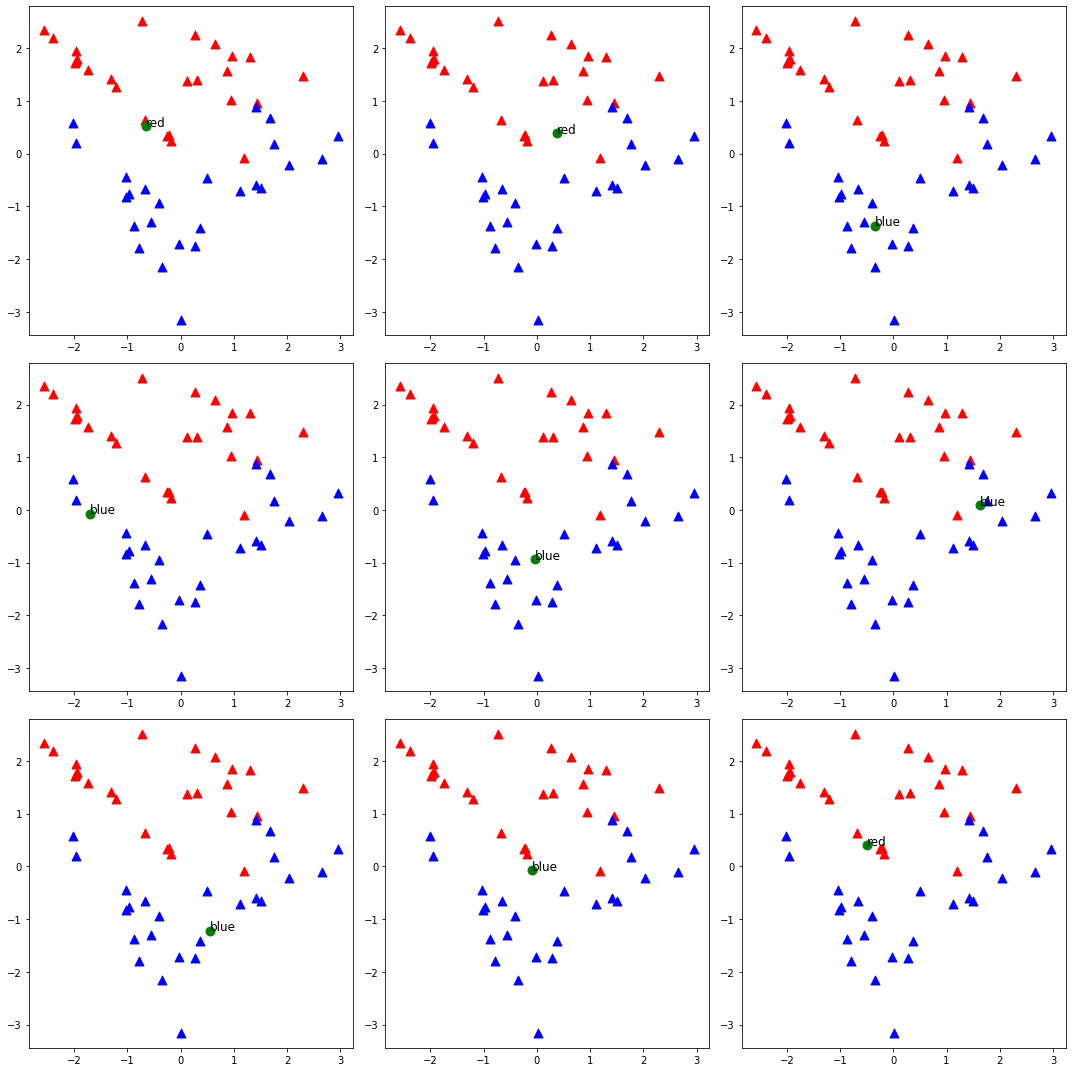

In [5]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(15, 15)


for i in range(9):
    # Create Dataset
    X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=30)
    
    blue = X[y==0]
    red = X[y==1]
    
    newcomer = np.random.randn(1, 2)
    
    K = 3*(i//3+1)
    
    axes[i//3, i%3].scatter(red[:, 0], red[:, 1], 80, "r", "^")
    axes[i//3, i%3].scatter(blue[:, 0], blue[:, 1], 80, "b", "^")
    axes[i//3, i%3].scatter(newcomer[:, 0], newcomer[:, 1], 80, "g", "o")
    
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X, y)
    pred = knn.predict(newcomer)
    
    axes[i//3, i%3].annotate("red" if pred==1 else "blue", xy=newcomer[0], xytext=(newcomer[0]), fontsize=12)
    
plt.tight_layout()
plt.show()

In [8]:
X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=30)

X[0], y[0]

(array([0.96229061, 1.84313516]), 1)

In [164]:
red = X[y==0]
blue = X[y==1]

In [191]:
newcomer = np.random.randn(1, 2)

print(newcomer)

[[-0.0989584   2.20785435]]


In [166]:
import collections

In [181]:
class KNN():
    def __init__(self, n_neighbors):
        self.K = n_neighbors
        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        
    def calc_dis(self):
        return np.array([((x_-self.new)**2).sum() for x_ in self.X], dtype=np.float64)
    
    def maxvalueindict(self, dic):
        k = list(dic.keys())
        v = list(dic.values())
        return k[v.index(max(v))]
    
    def predict(self, new, K=None):
        if K: self.K = K
            
        self.new = new
        distance = self.calc_dis()
        
        sorted_idx = np.argsort(distance, axis=0)
        
        labels = [self.Y[i] for i in sorted_idx[:self.K]]
        
        count = collections.Counter(labels)
        
        return self.maxvalueindict(count)
        
    def predictwithdis(self, new, K=None):
        if K: self.K = K
            
        self.new = new
        distance = self.calc_dis()
        
        sorted_idx = np.argsort(distance, axis=0)
        
        labels = [self.Y[i] for i in sorted_idx[:self.K]]
        
        count = collections.Counter(labels)
        
        return self.maxvalueindict(count), distance[sorted_idx[self.K-1]]
    
    


In [182]:
knn = KNN(3)
knn.fit(X, y)

In [183]:
pred = knn.predict(newcomer)

Counter({0: 3})


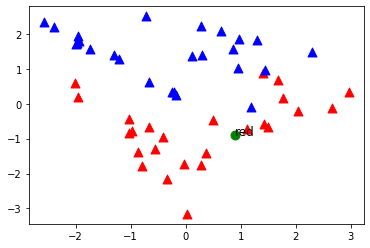

In [184]:
plt.scatter(red[:, 0], red[:, 1], 80, "r", "^")
plt.scatter(blue[:, 0], blue[:, 1], 80, "b", "^")
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, "g", "o")

plt.annotate("red" if pred==0 else "blue", xy=newcomer[0], xytext=(newcomer[0]), fontsize=12)

plt.show()

Counter({1: 1})


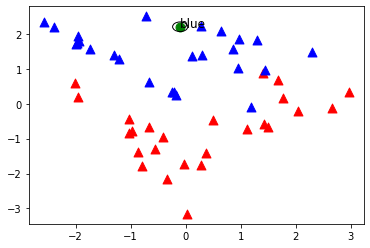

Counter({1: 5})


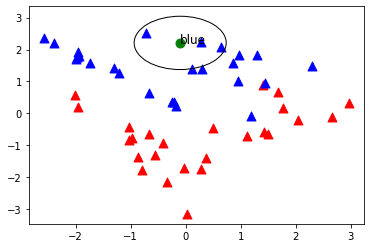

Counter({1: 9})


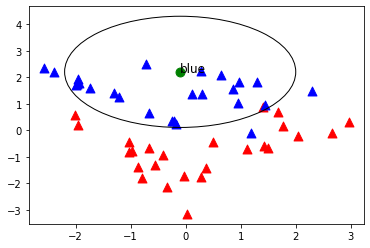

Counter({1: 13})


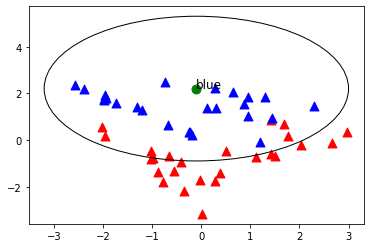

Counter({1: 17})


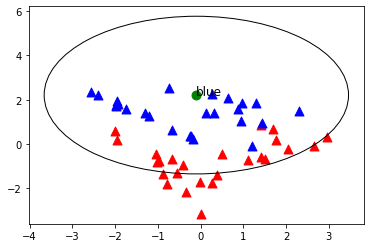

Counter({1: 21})


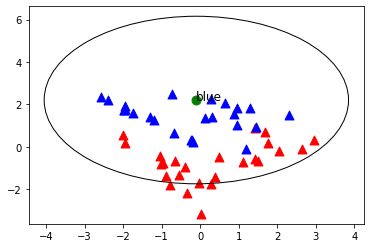

Counter({1: 23, 0: 2})


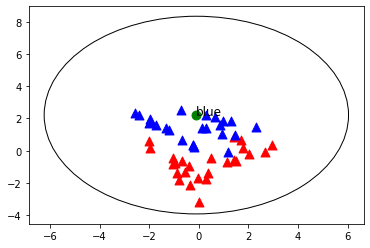

Counter({1: 25, 0: 4})


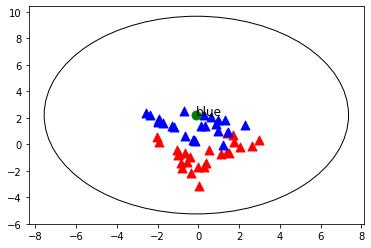

Counter({1: 25, 0: 8})


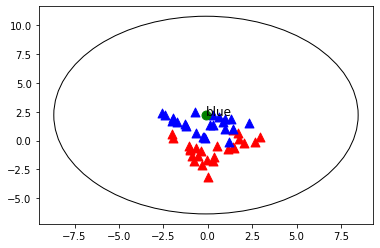

Counter({1: 25, 0: 12})


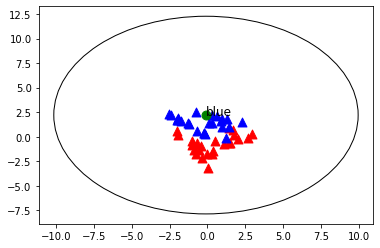

In [193]:
import time
import matplotlib.patches as patches


for i in range(10): 
    K = i*4+1
    
    pred, dis=knn.predictwithdis(newcomer, K)
    
    plt.scatter(red[:, 0], red[:, 1], 80, "r", "^")
    plt.scatter(blue[:, 0], blue[:, 1], 80, "b", "^")
    plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, "g", "o")

    plt.annotate("red" if pred==0 else "blue", xy=newcomer[0], xytext=(newcomer[0]), fontsize=12)
    
    circle = patches.Circle(newcomer[0], dis, fill=False)
    plt.gca().add_patch(circle)

    plt.show()
    
    time.sleep(1)